# Interactive VOI Bayesian parameter fiddler

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] RangeSlider(start=0.05, step=0.05, value=(0.4, 0.8), value_end=0.8, value_start=0.4)
        [3] Markdown(str)
        [4] FloatSlider(start=0.5, step=0.01, value=0.5)
        [5] Markdown(str)
        [6] FloatSlider(start=0.5, step=0.01, value=0.5)
        [7] Markdown(str)
        [8] Markdown(str)
        [9] FloatSlider(end=0.5, step=0.01, value=0.05)
        [10] Markdown(str)
        [11] RadioButtonGroup(options=['few', 'many', ...], value='many')
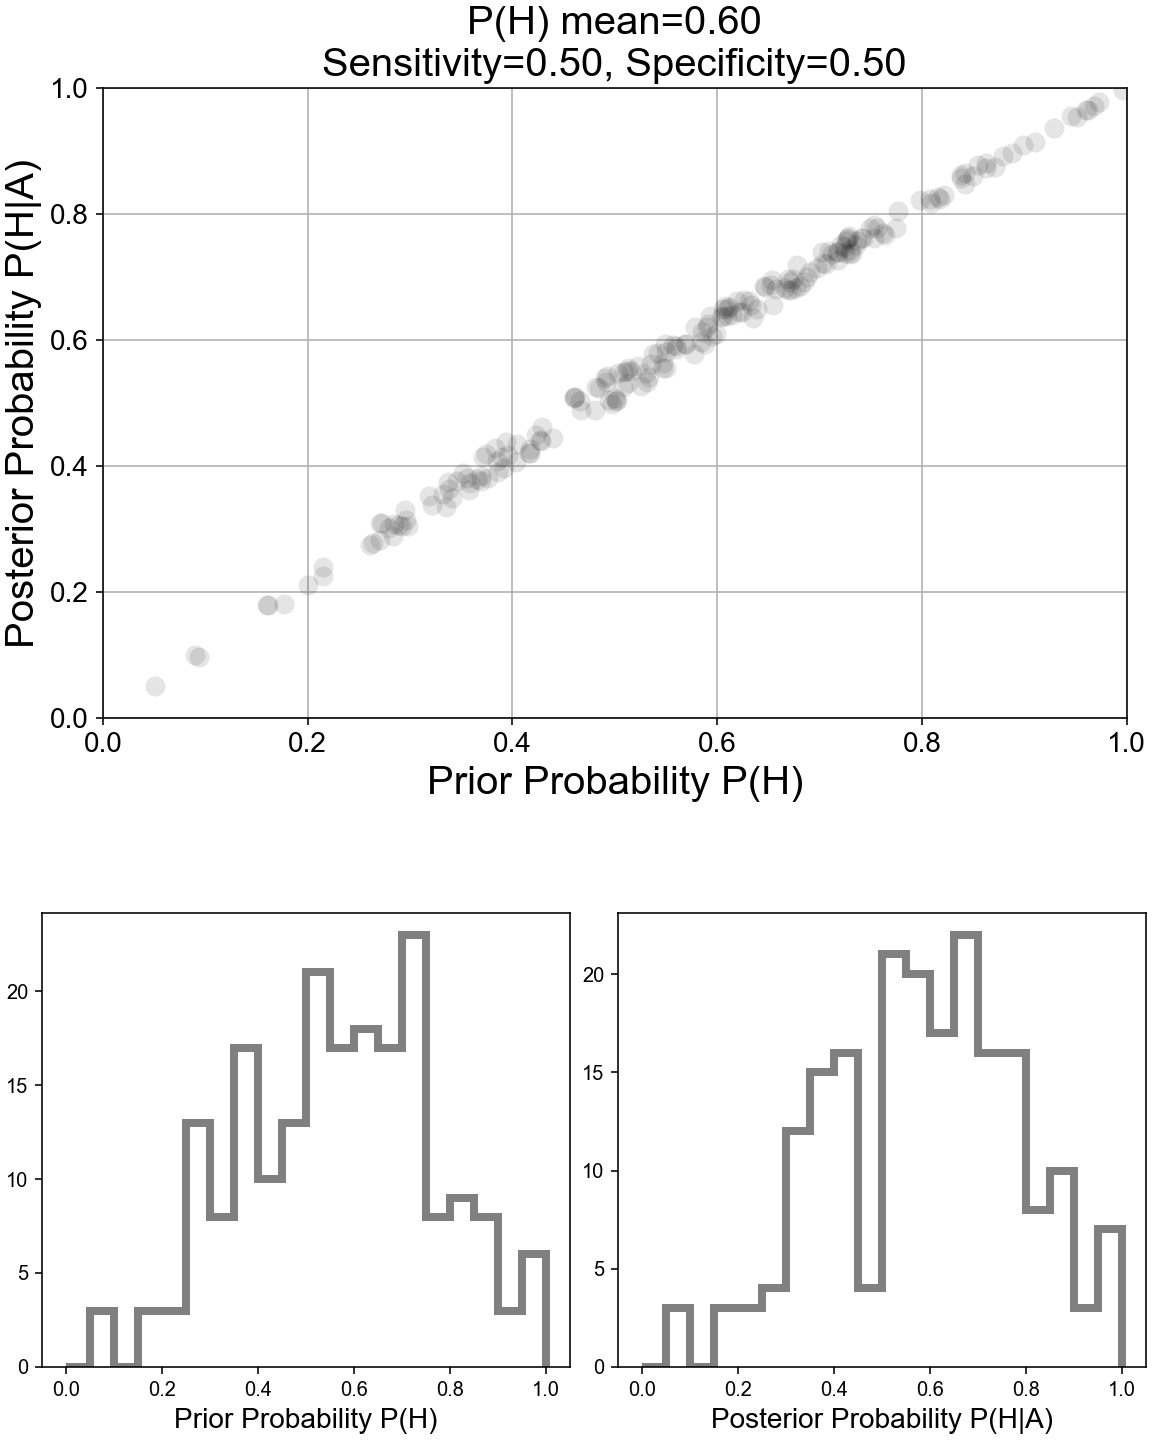

In [1]:
import panel as pn
import panel.widgets as pnw
pn.extension()

from voi_funcs import *

wpos  = pnw.RangeSlider(value=(0.4, 0.8), start=0.05, end=1.0, step=0.05)
wsens  = pnw.FloatSlider(value=0.5, start=0.5, end=1.0, step=0.01)
wspec  = pnw.FloatSlider(value=0.5, start=0.5, end=1.0, step=0.01)
wnoise  = pnw.FloatSlider(value=0.05, start=0.0, end=0.5, step=0.01)
wsamp  = pnw.RadioButtonGroup(options=['few', 'many', 'overkill'], value='many')
reactive_outliers = pn.bind(pn_simulation_posterior_v2, wpos, wsens, wspec, wnoise, wsamp)

widgets   = pn.Column('## Bayesian parameters',
                      'Prior POS or P(H)', wpos,
                      'Sensitivity', wsens,
                      'Specificity', wspec,
                      '## Simulation parameters',
                      'Max noise', wnoise,
                      'Samples', wsamp)
tool = pn.Row(reactive_outliers, widgets)
tool.servable()